# Exercise 7: Neural Networks using PyTorch

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

We are using again the wine-data from Exercise 4, but now building a neural network for prediction.

In [3]:
# load all examples from the file
data = np.genfromtxt('winequality-white.csv',delimiter=";",skip_header=1)

print("data:", data.shape)

# Prepare for proper training
np.random.shuffle(data) # randomly sort examples

# take the first 3000 examples for training
X_train = data[:3000,:11] # all features except last column
y_train = data[:3000,11]  # quality column

# and the remaining examples for testing
X_test = data[3000:,:11] # all features except last column
y_test = data[3000:,11] # quality column

print("First example:")
print("Features:", X_train[0])
print("Quality:", y_train[0])



data: (4898, 12)
First example:
Features: [5.600e+00 3.500e-01 4.000e-01 6.300e+00 2.200e-02 2.300e+01 1.740e+02
 9.922e-01 3.540e+00 5.000e-01 1.160e+01]
Quality: 7.0


Below is the simple 2-layer NN from last week implemented using PyTorch. In addition to the network we define the loss function and optimiser

In [4]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()

        # First layer of the network
        # 11 inputs, 20 outputs
        self.fc1 = nn.Linear(11,20) 
        
        # Second layer of the network
        # 20 inputs, 1 output
        self.fc2 = nn.Linear(20,1)
        
        # Relu activation function
        self.relu = nn.ReLU()

    
    def forward(self, x):
        
        # Apply the network to a given matrix of inputs x
        
        out = self.fc1(x) # apply first layer
        out = self.relu(out) # apply activation function
        out = self.fc2(out) # apply second layer
        return out

# Which device to use for NN calculations
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  

# Create network object
model = NeuralNet().to(device)

# Loss function
criterion = nn.MSELoss()
# Optimisation: SGD = stochastic gradient descent
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
 
# Keep track of the losses 
train_losses = []
test_losses = []

# Training loop and evaluation below

The code below trains the network for 20 epochs using the loss function and optimiser defined above. Each example is individually passed to the network

Epoch: 0 Train Loss: 0.7853623918274775 Test Loss: 0.7043667502552106
Epoch: 1 Train Loss: 0.7840078762700801 Test Loss: 0.7030146756185044
Epoch: 2 Train Loss: 0.7826669703195406 Test Loss: 0.7019853235605823
Epoch: 3 Train Loss: 0.7815583948292587 Test Loss: 0.6993220170545478
Epoch: 4 Train Loss: 0.7801968371497784 Test Loss: 0.6977911926012969
Epoch: 5 Train Loss: 0.778758531362185 Test Loss: 0.6967399989856083
Epoch: 6 Train Loss: 0.777373013153135 Test Loss: 0.6961726157104088
Epoch: 7 Train Loss: 0.776022612389415 Test Loss: 0.6944426556303125
Epoch: 8 Train Loss: 0.7749072887825188 Test Loss: 0.6922864669801617
Epoch: 9 Train Loss: 0.7733761178538073 Test Loss: 0.691406430471949
Epoch: 10 Train Loss: 0.771808809362995 Test Loss: 0.690337849438832
Epoch: 11 Train Loss: 0.7703409625739426 Test Loss: 0.6890191992754601
Epoch: 12 Train Loss: 0.768771757320751 Test Loss: 0.687729021933811
Epoch: 13 Train Loss: 0.7672047610034364 Test Loss: 0.6862621781095459
Epoch: 14 Train Loss: 0.

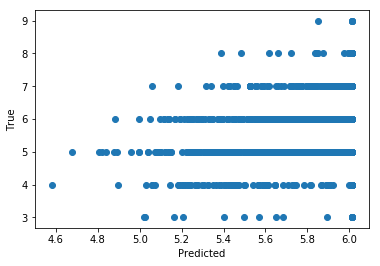

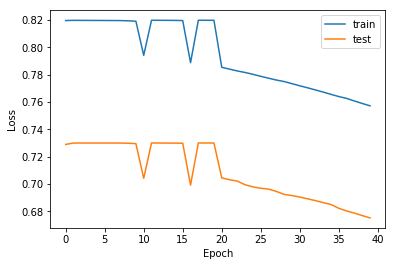

In [9]:
# how many epochs to train
n_epochs = 20 # This will train for one epoch

train_examples = X_train.shape[0]

# Loop over the epochs
for ep in range(n_epochs):
                
    # Each epoch is a complete loop over the training data
    for i in range(train_examples):
        
        # Reset gradient
        optimizer.zero_grad()
        
        # Convert x and y to proper objects for PyTorch
        x = torch.tensor(X_train[i],dtype=torch.float)
        y = torch.tensor(y_train[i],dtype=torch.float)

        # Apply the network 
        net_out = model(x)
                
        # Calculate the loss function
        loss = criterion(net_out,y)
                
        # Calculate the gradients
        loss.backward()
        
        # Update the weights
        optimizer.step()
        
        
    # Calculate predictions for the full training and testing sample
    y_pred_train = model(torch.tensor(X_train,dtype=torch.float)).detach().numpy().flatten()
    y_pred = model(torch.tensor(X_test,dtype=torch.float)).detach().numpy().flatten()

    # Calculate aver loss / example over the epoch
    train_loss = np.mean((y_pred_train-y_train)**2)
    test_loss = np.mean((y_pred-y_test)**2)
    
    # print some information
    print("Epoch:",ep, "Train Loss:", train_loss,  "Test Loss:", test_loss)
    
    # and store the losses for later use
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    
    
# After the training:
    
# Prepare scatter plot
y_pred =  model(torch.tensor(X_test,dtype=torch.float)).detach().numpy().flatten()


print("Best loss:", min(test_losses), "Final loss:", test_losses[-1])

print("Correlation coefficient:", np.corrcoef(y_pred,y_test)[0,1])
plt.scatter(y_pred_train,y_train)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Prepare and loss over time
plt.plot(train_losses,label="train")
plt.plot(test_losses,label="test")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()



# Homework

This week's goal is to gain familiarty with the PyTorch library which we will be using for the rest of the week. It is documented [here]
    * Currently SGD is used without momentum. Try training with a momentum term (see the documentation of SGD)
    * Replace SGD with the Adam optimiser and train using that
    * Add two more hidden layers to the network (you can choose the number of nodes but make sure to apply the ReLu activation function after each) and train again
    * (more difficult) Instead of single examples, switch to training using batches of 5 examples. Note that the network can simply be applied to a matrix of multiple examples. In this case it will return a vector with one output per example
  
[here]: https://pytorch.org/docs/stable/index.html

In [7]:
# SGD with momentum:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Adam instead of SGD
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [8]:
# 2 extra layers
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()

        # First layer of the network
        # 11 inputs, 20 outputs
        self.fc1 = nn.Linear(11,20) 
        
        # Second layer of the network
        # 20 inputs, 20 outputs
        self.fc2 = nn.Linear(20,20)
        
        # 20 inputs, 20 outputs
        self.fc3 = nn.Linear(20,20)
        
        # 20 inputs, 1 output
        self.fc4 = nn.Linear(20,1)
        
        
        # Relu activation function
        self.relu = nn.ReLU()

    
    def forward(self, x):
        
        # Apply the network to a given matrix of inputs x
        
        out = self.fc1(x) # apply first layer
        out = self.relu(out) # apply activation function
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = self.relu(out)
        out = self.fc4(out)
        return out

In [10]:
# Training with batches

# how many epochs to train
n_epochs = 20 # This will train for one epoch

batch_size = 5

train_examples = X_train.shape[0]

n_batches = int(train_examples/batch_size)

# Loop over the epochs
for ep in range(n_epochs):
                
    # Each epoch is a complete loop over the training data
    for i in range(n_batches):
        
        # Reset gradient
        optimizer.zero_grad()
        
        i_start = i*batch_size
        i_stop  = (i+1)*batch_size
        
        # Convert x and y to proper objects for PyTorch
        x = torch.tensor(X_train[i_start:i_stop],dtype=torch.float)
        y = torch.tensor(y_train[i_start:i_stop],dtype=torch.float)

        # Apply the network 
        net_out = model(x)
                
        # Calculate the loss function
        loss = criterion(net_out,y)
                
        # Calculate the gradients
        loss.backward()
        
        # Update the weights
        optimizer.step()
        
        
    # Calculate predictions for the full training and testing sample
    y_pred_train = model(torch.tensor(X_train,dtype=torch.float)).detach().numpy().flatten()
    y_pred = model(torch.tensor(X_test,dtype=torch.float)).detach().numpy().flatten()

    # Calculate aver loss / example over the epoch
    train_loss = np.mean((y_pred_train-y_train)**2)
    test_loss = np.mean((y_pred-y_test)**2)
    
    # print some information
    print("Epoch:",ep, "Train Loss:", train_loss,  "Test Loss:", test_loss)
    
    # and store the losses for later use
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    

/Users/gregor/anaconda3/lib/python3.7/site-packages/torch/nn/modules/loss.py:443: UserWarning: Using a target size (torch.Size([5])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 0 Train Loss: 0.7892789458350641 Test Loss: 0.7054502748592628
Epoch: 1 Train Loss: 0.7945569901622886 Test Loss: 0.7083497922995877
Epoch: 2 Train Loss: 0.799396368371176 Test Loss: 0.7116012396460433
Epoch: 3 Train Loss: 0.8020542872536742 Test Loss: 0.7136232386903869
Epoch: 4 Train Loss: 0.80300117316521 Test Loss: 0.7143517062021001
Epoch: 5 Train Loss: 0.8022572578493185 Test Loss: 0.7138315736724329
Epoch: 6 Train Loss: 0.801473834406285 Test Loss: 0.7130400289509724
Epoch: 7 Train Loss: 0.8062898632694625 Test Loss: 0.7175179030233204
Epoch: 8 Train Loss: 0.8077710177968832 Test Loss: 0.7188613582337607
Epoch: 9 Train Loss: 0.8086782713496201 Test Loss: 0.719709562748476
Epoch: 10 Train Loss: 0.8097747681714568 Test Loss: 0.7207169702311825
Epoch: 11 Train Loss: 0.8104026255237052 Test Loss: 0.7212025284378297
Epoch: 12 Train Loss: 0.8110393229683223 Test Loss: 0.7217828118933701
Epoch: 13 Train Loss: 0.8109090234203592 Test Loss: 0.7217171698868352
Epoch: 14 Train Loss: